In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [63]:
class Const:
    def __init__(self):
        self.n_animals_max = 2000
        self.n_animals_start = 20  # Original n_animals
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 3
        
        self.hp_baby = 25
        self.hp_food = 5
        self.hp_reproduction = 50   #min threshold before reporducing
        self.hp_birthcost = 15   
        self.hp_leak = 0.5      #starving rate of sorts
        
        self.food_rate = 1*9
        self.eating_distance = 0.1 **2
        self.n_food_max = 10000
        self.n_food_start = 800

In [64]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        
        #let there be food
        foodx = np.ones(c.n_food_max)*-1
        foodx[:c.n_food_start] = np.random.uniform(low=0, high=c.arena_size, size=c.n_food_start)
        foody = np.random.uniform(low=0, high=c.arena_size, size=c.n_food_max) 
        
        
        n_animals = np.zeros(c.n_steps)  #total number of moments 

        if show_dotses:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) 
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            
            vx = np.where(np.logical_or(x>c.arena_size,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size,y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x,c.arena_size)) 
            y = np.maximum(0,np.minimum(y,c.arena_size))
            
            potential_babies = np.argwhere(hp<=0)
            baby_counter = 0
            
            for i_animal in np.argwhere(hp>0): 
            
                d = np.square(foodx-x[i_animal]) + np.square(foody-y[i_animal])
                food_list = np.argwhere(d < c.eating_distance)
                hp[i_animal] += food_list.size*c.hp_food
                foodx[food_list] = -1
                
                if hp[i_animal]>=c.hp_reproduction: 
                    hp[i_animal] -= c.hp_birthcost                 
                    if baby_counter < len(potential_babies): 
                        ind = potential_babies[baby_counter] 
                        baby_counter += 1                    
                        hp[ind] = c.hp_baby
                        x[ind] = x[i_animal]
                        y[ind] = y[i_animal]
                        vx[ind] = vx[i_animal]
                        vy[ind] = vy[i_animal]

            potential_cabbage = np.argwhere(foodx<0)
            if potential_cabbage.size != 0:
                foodx[potential_cabbage[0]] = np.random.uniform(low=0, high=c.arena_size)
                foody[potential_cabbage[0]] = np.random.uniform(low=0, high=c.arena_size)
            
            hp-= c.hp_leak
            
            n_animals[t] = np.sum(hp>0)
            
            if show_dotses: 
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=5);
                plt.plot(foodx, foody,'g.', markersize=2)
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() 

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


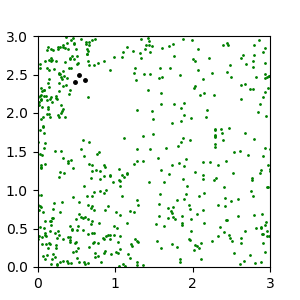

<IPython.core.display.Javascript object>


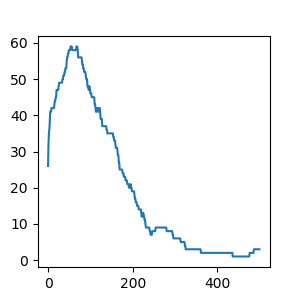

In [65]:
c = Const()
curve = model(c, show_dotses=True);
plt.figure(figsize = (3,3))
plt.plot(curve);

My main guess is that the babies all start at one health and the uniformity of the babies' health means that there is  a sudden boost of those grandbabies (so to speak) if they are in an area with lost of food. If this is the error, I don't know how to 

My second quess/question is that the reproduction cost is less than half the life of the parent? That means that every single parent is having twins the first time they reproduce right? 